# Exploratory Data Analysis 
The purpose of this notebook is to explore the data using decriptive statistics and visualizations to see if the data is suitable for a simple linear regession model. The dependent variable I will be trying to predict will be the happiness score of each country.

In [1]:
#Import libraries
import pandas as pd
import seaborn as sns
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt

#load data 
df = pd.read_csv("Data\clean_happiness_data.csv")

## Summary Statistics

In [2]:
df.describe()

,Year,Happiness Rank,Happiness Score,GDP Per Capita,Government Corruption,Freedom,Family,Life Expectancy,Generosity
count,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000
mean,2015.993617,78.829787,5.370728,0.927830,0.134790,0.402828,0.990347,0.579968,0.242241
std,0.816907,45.281408,1.136998,0.415584,0.111313,0.150356,0.318707,0.240161,0.131543
min,2015.000000,1.000000,2.693000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2015.000000,40.000000,4.509000,0.605292,0.059777,0.297615,0.793000,0.402301,0.152831
50%,2016.000000,79.000000,5.282500,0.995439,0.099502,0.418347,1.025665,0.630053,0.223140
75%,2017.000000,118.000000,6.233750,1.252443,0.173161,0.516850,1.228745,0.768298,0.315824
max,2017.000000,158.000000,7.587000,1.870766,0.551910,0.669730,1.610574,1.025250,0.838075


No extreme outliers stand out.

 ## Correlation 

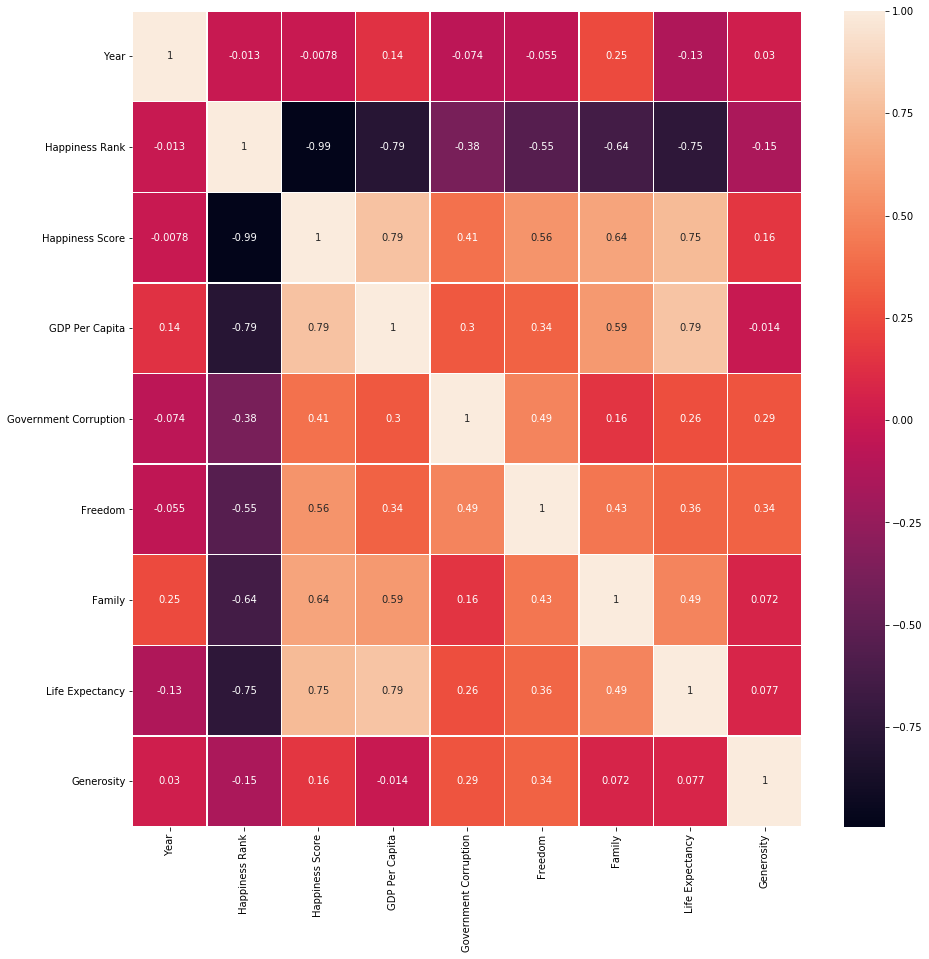

In [3]:
#Correlation matrix to examine relationships between variables 
corr_matrix = df.corr()
f,ax = plt.subplots(figsize=(15, 15))
sns.heatmap(corr_matrix, annot=True, linewidths=.5)

This correlation matrix shows that there is a strong correlation between Happiness Score and:

1. GDP Per Capita
2. Life Expectancy (correlated with GDP Per Capita)
3. Family (correlated with GDP Per Capita)
4. Freedom
5. Government corruption
6. Generosity

All of which are positive correlations. These results will help when narrowing down the variables to use for the OLS model.
It was interesting to see the strong correlations between Family/Life Expectancy and GDP Per Capita.

## Linear Relationships Between Variables

<function matplotlib.pyplot.show(*args, **kw)>

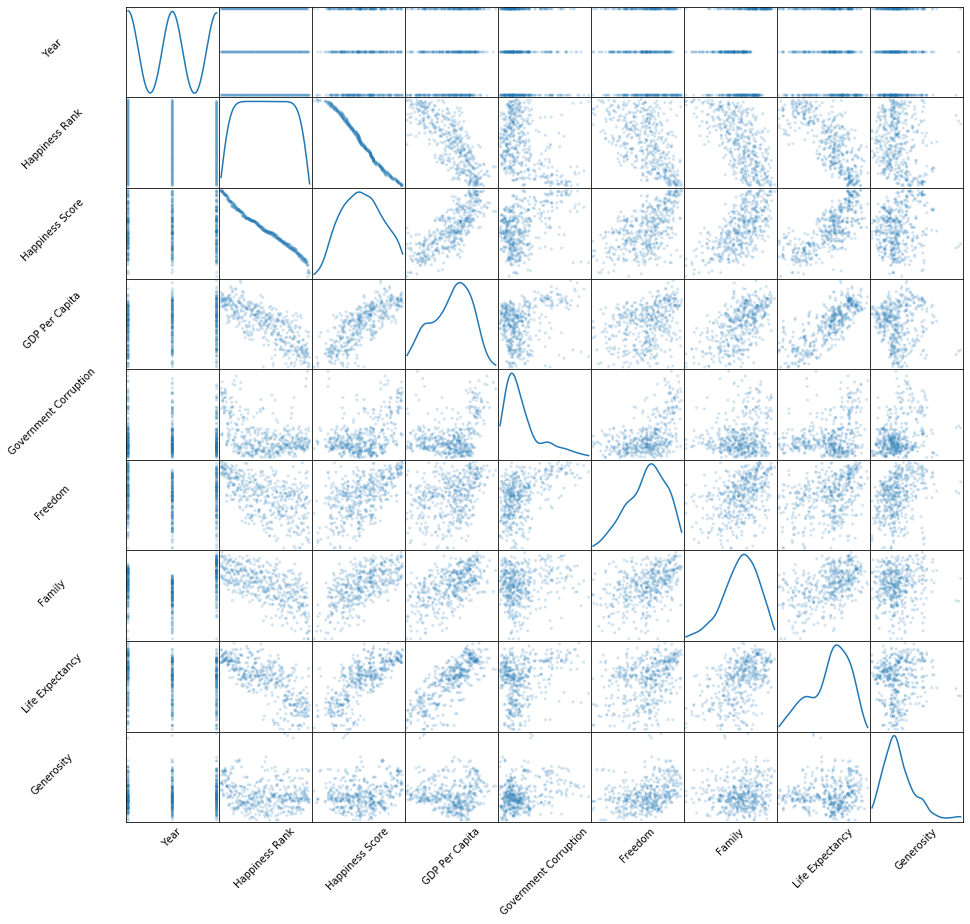

In [4]:
scat_mat = scatter_matrix(df, alpha=0.2, figsize=(15, 15), diagonal='kde')
#Change label rotation
[s.xaxis.label.set_rotation(45) for s in scat_mat.reshape(-1)]
[s.yaxis.label.set_rotation(45) for s in scat_mat.reshape(-1)]
#offset label to prevent overlap
[s.get_yaxis().set_label_coords(-0.75,0.5) for s in scat_mat.reshape(-1)]
#Hide all ticks
[s.set_xticks(()) for s in scat_mat.reshape(-1)]
[s.set_yticks(()) for s in scat_mat.reshape(-1)]
plt.show

There appears to be decent linear relationships between Happiness Score and the other variables. With the only exceptions being generosity and government corruption.

## Distribution of Variables

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000020A15B6BCC8>,
      dtype=object)

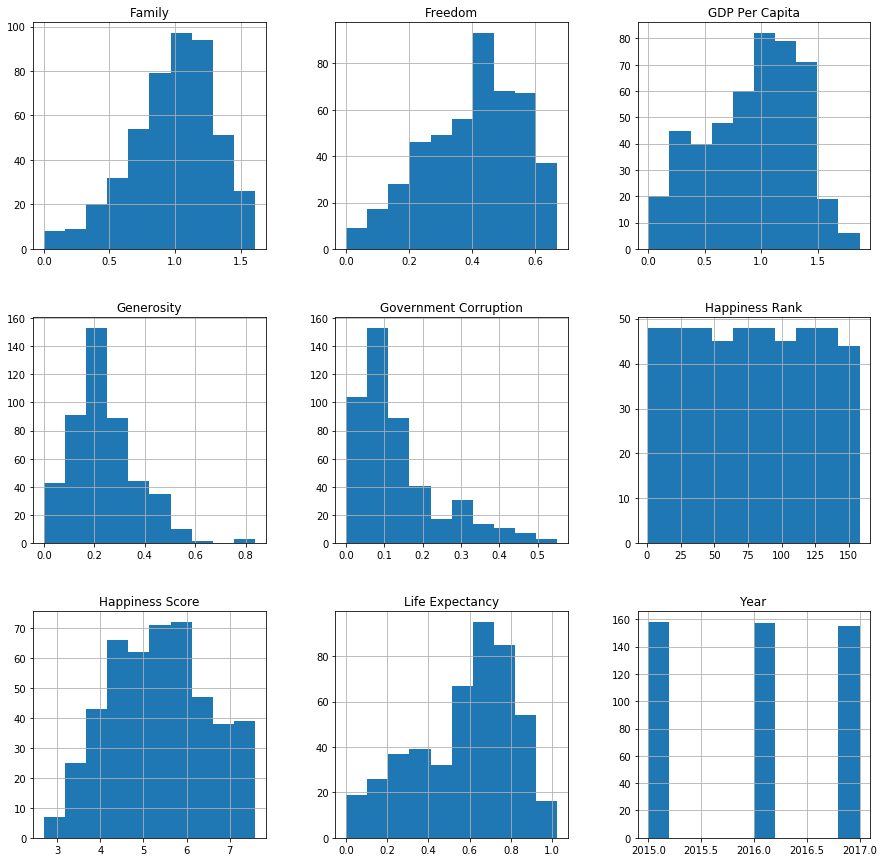

In [5]:
#Histogram matrix of all variables
df.hist(figsize = (15, 15))

This strengthens the argument for the normal distribution of Happiness Score. Government corruption, generosity, family, and freedom are slightly skewed but this is of little concern as they will not be used as the dependent variable.

## Happiest Countries Each Year

In [6]:
top3 = pd.DataFrame(df.groupby('Year').head(3))
top3[['Year', 'Country']]

,Year,Country
0,2015,Switzerland
1,2015,Iceland
2,2015,Denmark
158,2016,Denmark
159,2016,Switzerland
160,2016,Iceland
315,2017,Norway
316,2017,Denmark
317,2017,Iceland


It is of little surprise that the Nordic countries are consistently in the top 3 happiest countries each year.